# 5. Feature Engineering (Ingeniería de Atributos)

---

A continuación, se lleva a cabo el proceso de *feature engineering*, posterior a la obtención de insights relevantes en el análisis exploratorio de datos.

Primero, se importan las librerías requeridas y el conjunto de datos previamente procesado.

In [1]:
# Importación de datos y gestión de rutas
import sys
import os
sys.path.append('..') # Folder principal del projecto
from config import PROCESSED_DATA_PATH

# Computación científica y manejo de datos
import pandas as pd

#Filtrar warnings
import warnings
warnings.filterwarnings('ignore')

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

In [2]:
# Importar conjunto de datos procesado
try:
    df = pd.read_csv(PROCESSED_DATA_PATH, low_memory=False)
except:
    raise FileNotFoundError('No se encontró el archivo, favor de ejecutar el Notebook "3_data_wrangling.ipynb"')

# Observar primeras filas del DataFrame
df.head(5)

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Regular American,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Regular American,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Regular American,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Regular American,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Regular American,Web,08/30/2013,Closed with explanation,Yes,Yes


## 5.1 Variables de tiempo

<p style="text-align: justify;">Como se observó anteriormente, se pudieron observar ciertos patrones de interés al momento de analizar tanto el comportamiento de la variable target como las quejas en general a lo largo del tiempo, por lo que se procederá a crear tres variables en búsqueda de alguna relación con la variable target:</p>

- Mes.
- Año.
- <p style="text-align: justify;">Cuarto (1 = enero, febrero y marzo; 2 = abril, mayo, junio; 3 = julio, agosto, septiembre; 4 = octubre, noviembre, diciembre).</p>

In [3]:
#Crear columnas con mes y año, para posteriormente eliminar la columna de fecha de recibo.
df['year'] = pd.DatetimeIndex(df['date_received']).year
df['month'] = pd.DatetimeIndex(df['date_received']).month
df['quarter'] = pd.DatetimeIndex(df['date_received']).quarter
df.head()

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,year,month,quarter
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Regular American,Referral,09/03/2013,Closed with explanation,Yes,Yes,2013,8,3
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Regular American,Referral,09/03/2013,Closed with explanation,Yes,Yes,2013,8,3
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Regular American,Postal mail,09/18/2013,Closed with explanation,Yes,No,2013,8,3
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Regular American,Email,08/30/2013,Closed with explanation,Yes,Yes,2013,8,3
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Regular American,Web,08/30/2013,Closed with explanation,Yes,Yes,2013,8,3


## 5.2 Reducción de variabilidad

<b><u>Variable <i>Zipcode</i></u></b>

<p style="text-align: justify;">Gracias a la un profundo análisis sobre la variable Zipcode, y posteriormente revisando a través de la herramienta de Ydata Profiler, se puede observar que la variable Zipcode cuenta con una alta cardinalidad. Sin embargo, se puede emplear una codificación para clasificar al área del país estadounidense por región, ya que como se observó previamente en el EDA, existen ligeras variaciones entre la proporción de satisfacción de los usuarios con la resolución de una queja de acuerdo a su ubicación geográfica.</p>

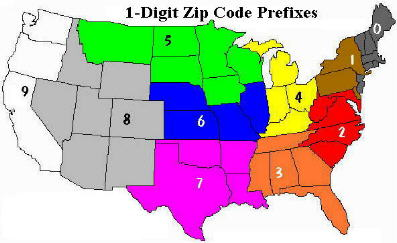

Se clasificarán las regiones de acuerdo al primer digito del codigo postal de cada registro:

|      Región      |      Prefijo      |
|:------------------:|:------------------:|
|      West          |      9 , 8          |
|      Midwest          |      5 , 6          |
|      South          |      7 , 3 , 2         |
|      Northeast          |      4 , 1 , 0          |

In [4]:
#Crear la columna región.
df['region'] = '0'

#Modificar el código postal para poder operarlo como un string.
df['zipcode'] = df['zipcode'].astype('str')

#Crear columna con el primer dígito del código postal e ingresar los valores para cada región.
df['zipcode_prefix'] = df['zipcode'].str[0]
df['zipcode_prefix'] = df['zipcode_prefix'].astype('str')
df.loc[(df.zipcode_prefix == '9') | (df.zipcode_prefix == '8'), 'region'] = 'West'
df.loc[(df.zipcode_prefix == '5') | (df.zipcode_prefix == '6'), 'region'] = 'Midwest'
df.loc[(df.zipcode_prefix == '7') | (df.zipcode_prefix == '3') | (df.zipcode_prefix == '2'), 'region'] = 'South'
df.loc[(df.zipcode_prefix == '4') | (df.zipcode_prefix == '1') | (df.zipcode_prefix == '0'), 'region'] = 'Northeast'

#Eliminar columna zipcode_prefix.
df = df.drop(columns = 'zipcode_prefix')
df.head(10)

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,year,month,quarter,region
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Regular American,Referral,09/03/2013,Closed with explanation,Yes,Yes,2013,8,3,West
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Regular American,Referral,09/03/2013,Closed with explanation,Yes,Yes,2013,8,3,West
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Regular American,Postal mail,09/18/2013,Closed with explanation,Yes,No,2013,8,3,Northeast
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Regular American,Email,08/30/2013,Closed with explanation,Yes,Yes,2013,8,3,South
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Regular American,Web,08/30/2013,Closed with explanation,Yes,Yes,2013,8,3,South
5,08/30/2013,Credit card,Application processing delay,Capital One,NY,12206,Regular American,Phone,09/03/2013,Closed with explanation,Yes,Yes,2013,8,3,Northeast
6,08/30/2013,Credit card,Credit line increase/decrease,Wells Fargo & Company,AZ,85730,Regular American,Postal mail,09/05/2013,Closed with explanation,Yes,No,2013,8,3,West
7,08/30/2013,Bank account or service,Deposits and withdrawals,Bank of America,IL,60660,Regular American,Referral,09/04/2013,Closed with explanation,Yes,No,2013,8,3,Midwest
8,08/30/2013,Bank account or service,Deposits and withdrawals,Bank of America,GA,30016,Regular American,Referral,09/04/2013,Closed with explanation,Yes,No,2013,8,3,South
9,09/17/2013,Mortgage,"Loan modification,collection,foreclosure","SunTrust Banks, Inc.",CA,94551,Regular American,Web,09/18/2013,Closed with explanation,Yes,Yes,2013,9,3,West


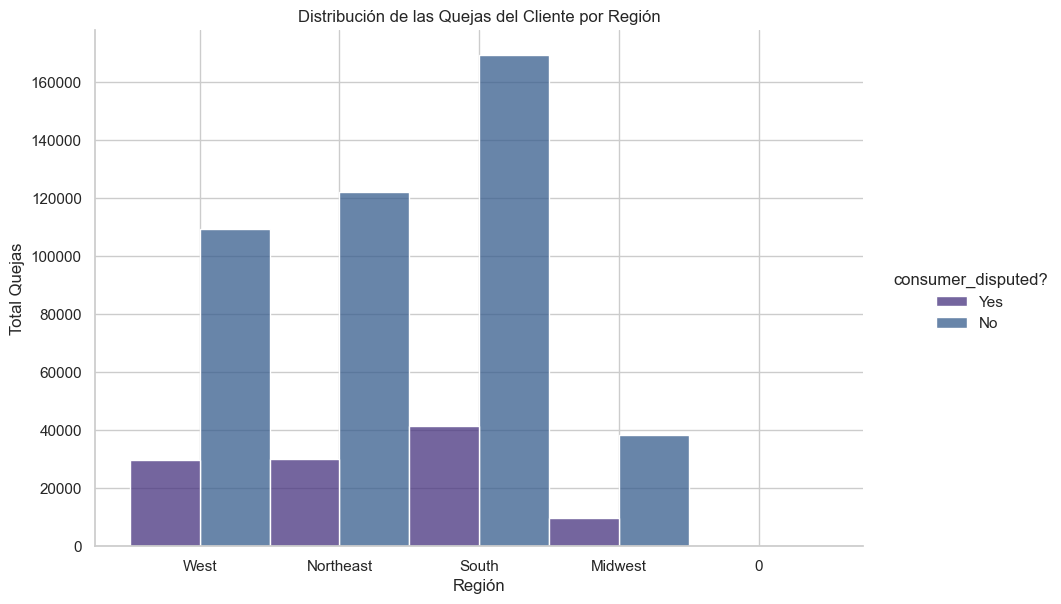

In [5]:
# Set the style and color palette
sns.set(style="whitegrid", palette="viridis")

# Create the displot with Seaborn
fig = sns.displot(data=df, x="region", hue="consumer_disputed?", multiple="dodge", height=6, aspect=1.5)

# Customize the plot
fig.set_axis_labels("Región", "Total Quejas")
fig.set(title="Distribución de las Quejas del Cliente por Región")

# Show the plot
sns.despine()
plt.show()

In [6]:
#Observar el conteo de valores únicos en la columna region
df.region.value_counts()

region
South        210961
Northeast    152289
West         139402
Midwest       48297
0               111
Name: count, dtype: int64

In [7]:
#Drop valores con un "0" en la columna region, luego de haberlos explorado se concluyó que no tienen relevancia alguna.
df = df[df.region != '0']
df.region.value_counts()

region
South        210961
Northeast    152289
West         139402
Midwest       48297
Name: count, dtype: int64

In [8]:
#Observar la proporción de insatisfacción por región
proporcion = df.region.loc[df['consumer_disputed?'] == 'Yes'].value_counts() / df.region.value_counts()
proporcion

region
South        0.196126
Northeast    0.197696
West         0.214567
Midwest      0.204257
Name: count, dtype: float64

<p style="text-align: justify;">Se puede observar que, si bien el número de quejas es mayor para la región Sur, la cantidad de quejas con disputa del cliente es proporcional al total de quejas. Aquellas regiones al Oeste del país cuentan ligeramente con una mayor proporción de usuarios insatisfechos.</p>

<b><u>Variables <i>State</i> / <i>Company</i></u></b>

<p style="text-align: justify;">Como se mencionó anteriormente, tanto la variable State como la variable Company, cuentan con una enorme cantidad de registros que proporcionan muy poca información, por lo que esto podría incrementar la variabilidad y por lo tanto el error dentro del modelo. Es por eso que, se ha tomado la decisión de generar el modelo con los datos más significativos y con mayor dominancia dentro de estos dos rubros, tomando las 10 compañías y los 10 estados más significativos, con los cuales se generará el modelo de machine learning.</p>

<p style="text-align: justify;">Esto ayudará a reducir la variabilidad, y además a poder preparar los conjuntos de datos para llevar a cabo la implementación del algoritmo utilizando una técnica de submuestreo.</p>

In [9]:
#Revisar los registros por cada estado.
state_count = df.groupby(['state'])['product'].count()
state_count.sort_values(ascending = False, inplace = True)
state_count.head(20)

state
CA    81684
FL    53661
TX    41344
NY    38257
GA    24546
NJ    22401
PA    20014
IL    19621
VA    18147
MD    17702
OH    17370
NC    15497
MI    14484
AZ    12347
WA    11552
MA    11102
CO     9491
TN     8521
MO     7230
SC     7011
Name: product, dtype: int64

In [10]:
#Revisar los registros por cada compañía
company_count = df.groupby(['company'])['product'].count()
company_count.sort_values(ascending = False, inplace = True)
company_count.head(20)

company
Bank of America                           55393
Wells Fargo & Company                     41534
JPMorgan Chase & Co.                      33496
Equifax                                   31607
Experian                                  30717
TransUnion Intermediate Holdings, Inc.    25342
Citibank                                  25241
Ocwen                                     20852
Capital One                               15474
Nationstar Mortgage                       13163
U.S. Bancorp                               9479
Synchrony Financial                        9350
Ditech Financial LLC                       8621
Navient Solutions, Inc.                    7933
PNC Bank N.A.                              6913
Encore Capital Group                       6255
HSBC North America Holdings Inc.           6089
Amex                                       5692
SunTrust Banks, Inc.                       4801
Discover                                   4732
Name: product, dtype: int64

In [11]:
#Crear una lista con cada uno de los Top 10 States.
states = list(state_count.index[0:10])

#Crear un diccionario para crear un DataFrame con 15,000 datos aleatorios de cada estado.
d = {}
for state in states:
    d[state] = df[df['state'] == state].sample(n = 15000)

#Concatenar los DataFrames creados previamente.    
df_states = pd.concat(d.values())
len(df_states)

150000

In [12]:
#Crear una lista con cada uno de los Top 10 Companies.
companies = list(company_count.index[0:10])

#Crear un diccionario para crear un dataframe con 3,000 datos aleatorios de cada empresa (ya filtrando los 10 estados elegidos).
d2 = {}
for company in companies:
    d2[company] = df_states[df_states['company'] == company].sample(3000)

#Concatenar los df creados previamente    
df_companies = pd.concat(d2.values())
len(df_companies)

30000

<p style="text-align: justify;">Ahora, se volverá a emplear una técnica de <b>submuestreo</b>, tomando una muestra de 10,000 datos, de los cuales 5,000 serán casos en los que el cliente quedó satisfecho con la resolución, y 5,000 casos en los que NO fue así.</p>

In [13]:
#Contar las dos clases de la variable target, para poder observar la proporción de la muestra.
print('Consumer Disputed')
print(f'Total YES: {len(df_companies[df_companies["consumer_disputed?"] == "Yes"])}')
print(f'Total NO: {len(df_companies[df_companies["consumer_disputed?"] == "No"])}')

Consumer Disputed
Total YES: 6067
Total NO: 23933


In [14]:
#Crear dos DataFrames, obteniendo las muestras correspondientes.
df_no = df_companies[df_companies['consumer_disputed?'] == 'No'].sample(n = 5000)
df_yes = df_companies[df_companies['consumer_disputed?'] == 'Yes'].sample(n = 5000)

#Concatenar DataFrames y ordenar por fechas.
df_sample = pd.concat([df_yes, df_no], axis = 0)
df_sample.sort_values(by = 'date_received')

,date_received,product,issue,company,state,zipcode,tags,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,year,month,quarter,region
347009,01/01/2013,Mortgage,"Application, originator, mortgage broker",Bank of America,FL,34483,Servicemember,Web,01/03/2013,Closed with explanation,No,Yes,2013,1,1,South
492123,01/01/2013,Credit card,Advertising and marketing,Capital One,VA,24503,Regular American,Web,01/03/2013,Closed with explanation,Yes,Yes,2013,1,1,South
179308,01/01/2015,Mortgage,"Loan modification,collection,foreclosure",Nationstar Mortgage,GA,31404,Regular American,Web,01/01/2015,Closed with explanation,Yes,No,2015,1,1,South
179281,01/01/2015,Bank account or service,Using a debit or ATM card,JPMorgan Chase & Co.,TX,75063,Regular American,Web,01/01/2015,Closed with explanation,Yes,Yes,2015,1,1,South
322165,01/01/2016,Credit card,Billing disputes,JPMorgan Chase & Co.,NY,10010,Older American,Web,01/04/2016,Closed with explanation,Yes,Yes,2016,1,1,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491080,12/31/2015,Mortgage,Other,Nationstar Mortgage,FL,33405,Regular American,Postal mail,01/05/2016,Closed with explanation,Yes,Yes,2015,12,4,South
490082,12/31/2015,Mortgage,"Application, originator, mortgage broker",Nationstar Mortgage,TX,799XX,Regular American,Web,12/31/2015,Closed with explanation,Yes,No,2015,12,4,South
520006,12/31/2015,Credit reporting,Incorrect information on credit report,Equifax,VA,23605,Servicemember,Web,12/31/2015,Closed with explanation,Yes,No,2015,12,4,South
494672,12/31/2015,Bank account or service,"Account opening, closing, or management",Wells Fargo & Company,GA,30034,Regular American,Phone,12/31/2015,Closed with explanation,Yes,No,2015,12,4,South


<p style="text-align: justify;">A continuación, previo a pasar a la implementación de los algoritmos en el modelo, se llevará a cabo una última limpieza al conjunto de datos, buscando validar que la información que llegará al algoritmo esta completamente curada y lista para poder llegar al proceso de aprendizaje de la mejor manera.</p>

In [15]:
#Contar valores nulos por columna.
df_sample.isna().sum(axis = 0)

date_received                   0
product                         0
issue                           0
company                         0
state                           0
zipcode                         0
tags                            0
submitted_via                   0
date_sent_to_company            0
company_response_to_consumer    0
timely_response                 0
consumer_disputed?              0
year                            0
month                           0
quarter                         0
region                          0
dtype: int64

In [16]:
#Eliminar columna 'date_sent_to_company', ya que no será relevante para la implementación del algoritmo.
df_sample = df_sample.drop(columns = ['date_sent_to_company'])

In [17]:
#Convertir la fecha en formato DateTime.
df_sample['date_received'] = pd.to_datetime(df_sample['date_received'])
df_sample.date_received.dtype

dtype('<M8[ns]')

## 5.3 Análisis Final con Y-Data Profiler

<p style="text-align: justify;">Antes de llevar a cabo la selección de variables, se explora nuevamente el comportamiento de las mismas a través de la herramienta de Ydata Profiler, con la finalidad de obtener una actualización sobre el comportamiento de las variables luego del procedimiento de ingeniería de atributos.</p>

In [18]:
#Nuevamente analizaremos el comportamiento de las variables
profile = ydata_profiling.ProfileReport(df_sample)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 223.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5.4 Selección de variables

<p style="text-align: justify;">Luego de un profundo análisis de las variables que componen al conjunto de datos en cuestión, así como diversas iteraciones y pruebas dentro del modelo, se ha optado por llevar a cabo el proceso de aprendizaje utilizando las siguientes variables:</p>

- Month
- Quarter
- Product
- Issue
- Company
- Company Response to Consumer
- Submitted Via
- Region

In [19]:
#Crear el DataFrame final con las columnas seleccionadas.
df_final = df_sample.loc[:,['month', 'quarter', 'product', 'issue', 'company_response_to_consumer',
                              'company','consumer_disputed?','submitted_via', 'timely_response']]
df_final.head()

,month,quarter,product,issue,company_response_to_consumer,company,consumer_disputed?,submitted_via,timely_response
324144,2,1,Mortgage,"Loan modification,collection,foreclosure",Closed with explanation,Ocwen,Yes,Web,Yes
215340,4,2,Mortgage,"Loan modification,collection,foreclosure",Closed with explanation,Ocwen,Yes,Web,Yes
370653,7,3,Mortgage,"Loan servicing, payments, escrow account",Closed with explanation,Nationstar Mortgage,Yes,Web,Yes
236458,7,3,Mortgage,"Loan modification,collection,foreclosure",Closed with explanation,JPMorgan Chase & Co.,Yes,Referral,Yes
406163,4,2,Mortgage,"Loan modification,collection,foreclosure",Closed without relief,Bank of America,Yes,Referral,Yes


In [20]:
#Exportar el DataFrame final que será utilizado para el modelado
from config import PROCESSED_DATA_DIR, MODEL_DATA_PATH

# Generar carpeta de data procesada si no existe
if not os.path.exists(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)
    print(f'Se creo el directorio: {PROCESSED_DATA_DIR}')
    
df_final.to_csv(MODEL_DATA_PATH, index=False)

<p style="text-align: justify;">Después de una amplia exploración sobre el conjunto de datos, y la implementación de diversos algoritmos para el desarrollo de modelos de clasificación binaria; se pudo llegar a la conclusión de que con las variables que se tienen dentro de este conjunto, no es del todo posible predecir con un óptimo nivel de efectividad si se generará una disputa luego de la resolución de la queja presentada por un usuario de servicios financieros en los 10 estados con mayor afluencia en el mercado. Sin embargo, se generó un modelo bastante interesante, aquel al que se le implementó  el algoritmo de LightGBM, que si bien, no tiene un nivel elevado de accuracy o precisión, tiene un Recall Score bastante aceptable; llegando al 75%. Esto dictamina que el modelo tiene un buen grado de acierto al momento de detectar verdaderos positivos, es decir; casos en los que se genera una disputa por parte del usuario. Este modelo podría ser de gran uso para predecir el output de una variable que, cabe destacar, es el valor con baja proporción en una variable bastante desbalanceada, por lo que podría ser un modelo de detección de valores atípicos y anticiparse ante una situación extraña.

Además, se atribuye la baja precisión a la naturaleza de las variables, y a la falta de variables descriptivas sociodemográficas sobre los usuarios, por lo que se extiende una recomendación a la CFPB de recopilar más datos y características sobre sus usuarios; por supuesto sin vulnerar su privacidad y con la única finalidad de poder diagnosticar de mejor manera la causa raíz de la presencia de quejas, e identificar aquellas en las que el usuario podría verse vulnerable ante las grandes instituciones financieras del país norteamericano.</p>